In [13]:
# load data\new\ZIP\NJ ZIP Data-To Share.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 24,
    'axes.titleweight': 'bold',
    'axes.labelsize': 20,
    'axes.labelweight': 'bold',
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
})

sns.set_context('talk')
sns.set_style('whitegrid')

data = pd.read_csv('data/new/ZIP/NJ ZIP Data-To Share.csv')
data.head()

,Unnamed: 0,Product Type,Approval Date,Product ID,Amount,Total Cost of Vehicles,How many vehicles of this model purchasing?,Vehicle Make,Vehicle Model,Vehicle Model Year,What is the vehicle class?
0,0,ZIP_Phase1,2021-05-19 00:00:00,PROD-00258414,170000.0,298000.0,2.0,Hino,M5 (195),NaN,"Class 5: 16,001 - 19,500 lbs"
1,1,ZIP_Phase1,2021-06-15 00:00:00,PROD-00258416,76400.0,132750.0,1.0,Ford,Transit Van,NaN,"Class 3: 10,001 - 14,000 lbs"
2,2,ZIP_Phase1,2021-06-15 00:00:00,PROD-002584164,114600.0,151500.0,1.0,Hino,M5 (195),NaN,"Class 5: 16,001 - 19,500 lbs"
3,3,ZIP_Phase1,2021-07-21 00:00:00,PROD-00276662,195500.0,276099.0,2.0,GreenPower,EV Star CarGo,NaN,"Class 4: 14,001 - 16,000 lbs"
4,4,ZIP_Phase1,2021-06-22 00:00:00,PROD-00258544,500000.0,775000.0,5.0,Xos,SV01 - 120,NaN,"Class 6: 19,501 - 26,000 lbs"


In [14]:
# drop unnamed 0
data = data.drop('Unnamed: 0', axis=1)
data.head(1)

,Product Type,Approval Date,Product ID,Amount,Total Cost of Vehicles,How many vehicles of this model purchasing?,Vehicle Make,Vehicle Model,Vehicle Model Year,What is the vehicle class?
0,ZIP_Phase1,2021-05-19 00:00:00,PROD-00258414,170000.0,298000.0,2.0,Hino,M5 (195),NaN,"Class 5: 16,001 - 19,500 lbs"


In [21]:
data.columns

Index(['Product Type', 'Approval Date', 'Product ID', 'Amount',
       'Total Cost of Vehicles', 'How many vehicles of this model purchasing?',
       'Vehicle Make', 'Vehicle Model', 'Vehicle Model Year',
       'What is the vehicle class? ', 'Date'],
      dtype='object')

In [15]:
# convert approval date to date time
data['Date'] = pd.to_datetime(data['Approval Date'])
data.head(1)

,Product Type,Approval Date,Product ID,Amount,Total Cost of Vehicles,How many vehicles of this model purchasing?,Vehicle Make,Vehicle Model,Vehicle Model Year,What is the vehicle class?,Date
0,ZIP_Phase1,2021-05-19 00:00:00,PROD-00258414,170000.0,298000.0,2.0,Hino,M5 (195),NaN,"Class 5: 16,001 - 19,500 lbs",2021-05-19


C:\Users\akash\AppData\Local\Temp\ipykernel_15812\1152377585.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Date', y='Amount', data=total_award_by_month, palette='viridis')


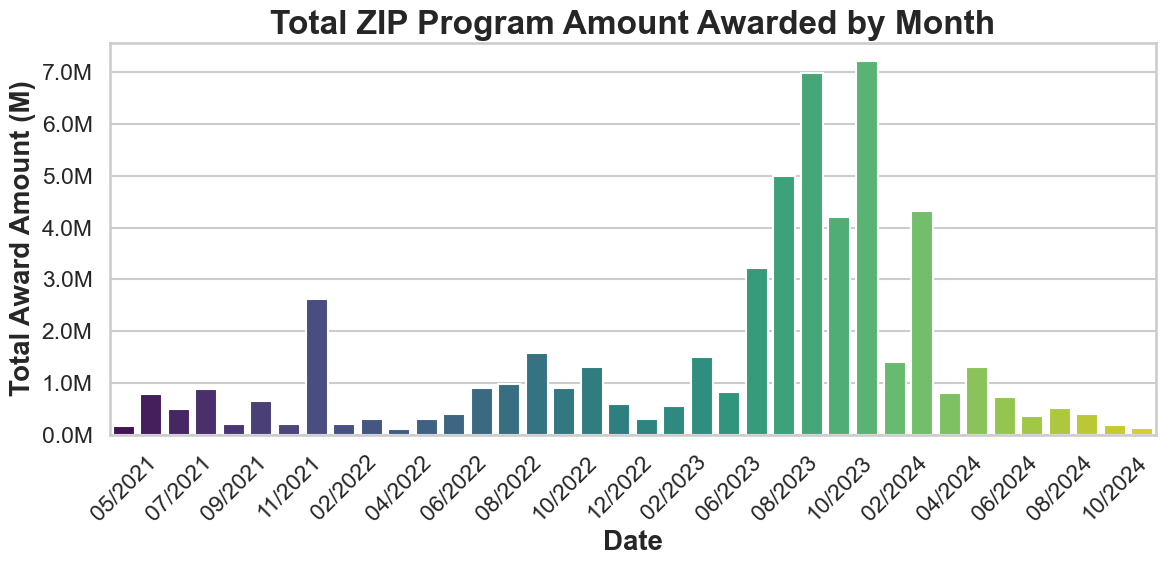

In [20]:
import matplotlib.ticker as ticker

total_award_by_month = data.groupby(data['Date'].dt.to_period('M'))['Amount'].sum().reset_index()
total_award_by_month['Date'] = total_award_by_month['Date'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='Amount', data=total_award_by_month, palette='viridis')
plt.title('Total ZIP Program Amount Awarded by Month', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Award Amount (M)', fontsize=20)

# Format x-axis with every other label and "%m/%Y"
plt.xticks(rotation=45)
ticks = plt.gca().get_xticks()
tick_labels = [total_award_by_month['Date'][int(i)].strftime('%m/%Y') if i % 2 == 0 else '' for i in range(len(ticks))]
plt.xticks(ticks, tick_labels)

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

plt.tight_layout()
plt.show()

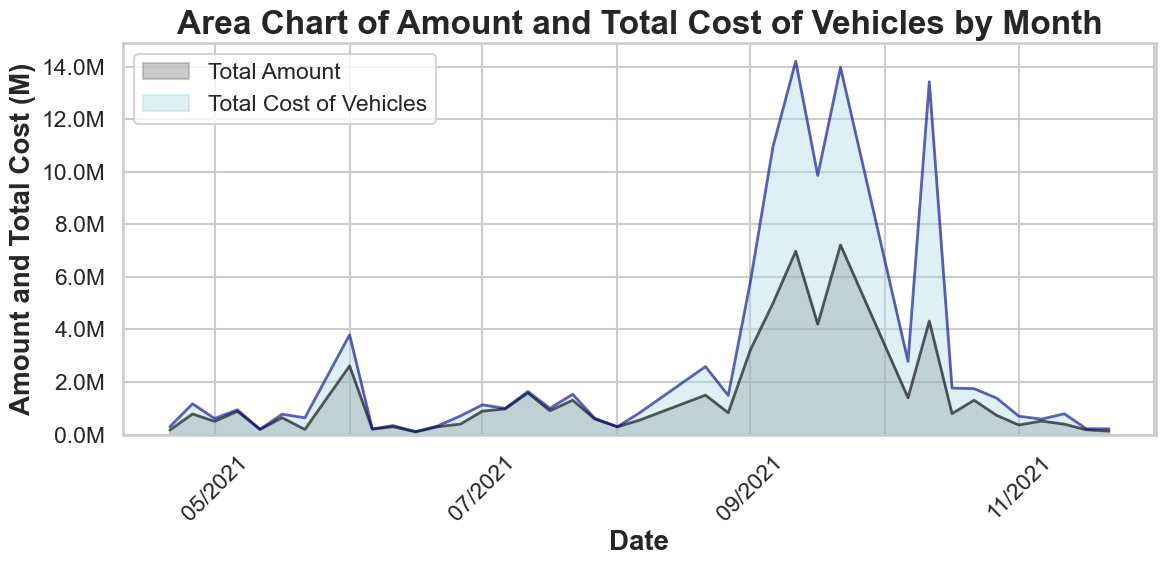

In [66]:
plt.figure(figsize=(12, 6))
plt.fill_between(total_award_by_month['Date'], total_award_by_month['Amount'], color='gray', alpha=0.4, label='Total Amount')
plt.plot(total_award_by_month['Date'], total_award_by_month['Amount'], color='black', alpha=0.6, linewidth=2)

# Adding Total Cost of Vehicles
plt.fill_between(total_award_by_month['Date'], data.groupby(data['Date'].dt.to_period('M'))['Total Cost of Vehicles'].sum().reset_index()['Total Cost of Vehicles'], color='lightblue', alpha=0.4, label='Total Cost of Vehicles')
plt.plot(total_award_by_month['Date'], data.groupby(data['Date'].dt.to_period('M'))['Total Cost of Vehicles'].sum().reset_index()['Total Cost of Vehicles'], color='darkblue', alpha=0.6, linewidth=2)

plt.title('Area Chart of Amount and Total Cost of Vehicles by Month', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Amount and Total Cost (M)', fontsize=20)

# Format x-axis with every other label and "%m/%Y"
plt.xticks(rotation=45)
ticks = plt.gca().get_xticks()
tick_labels = [total_award_by_month['Date'][int(i)].strftime('%m/%Y') if i % 2 == 0 else '' for i in range(len(ticks))]
plt.xticks(ticks, tick_labels)

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

# Add legend
plt.legend()

plt.ylim(0)

plt.tight_layout()
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_15812\2586401158.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Amount', y='Total Cost of Vehicles', size='How many vehicles of this model purchasing?',


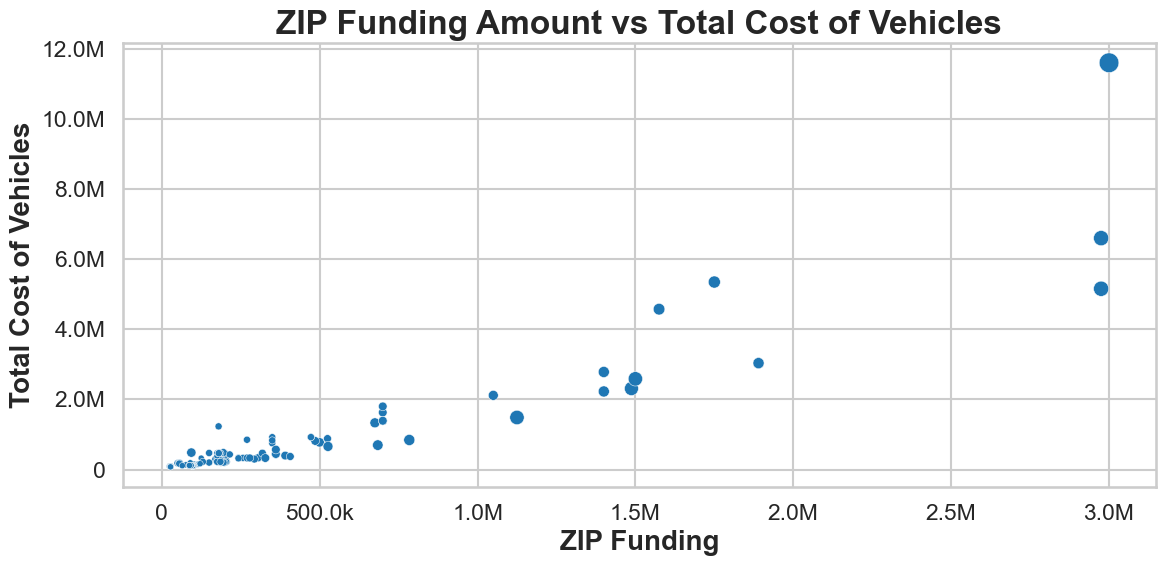

In [51]:
plt.figure(figsize=(12, 6))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '0' if x == 0 else f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.1f}k'))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '0' if x == 0 else f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.1f}k'))
sns.scatterplot(x='Amount', y='Total Cost of Vehicles', size='How many vehicles of this model purchasing?', 
                 sizes=(20, 200), data=data, legend=False, palette='viridis')
plt.title('ZIP Funding Amount vs Total Cost of Vehicles', fontsize=24)
plt.xlabel('ZIP Funding', fontsize=20)
plt.ylabel('Total Cost of Vehicles', fontsize=20)
plt.tight_layout()
plt.show()


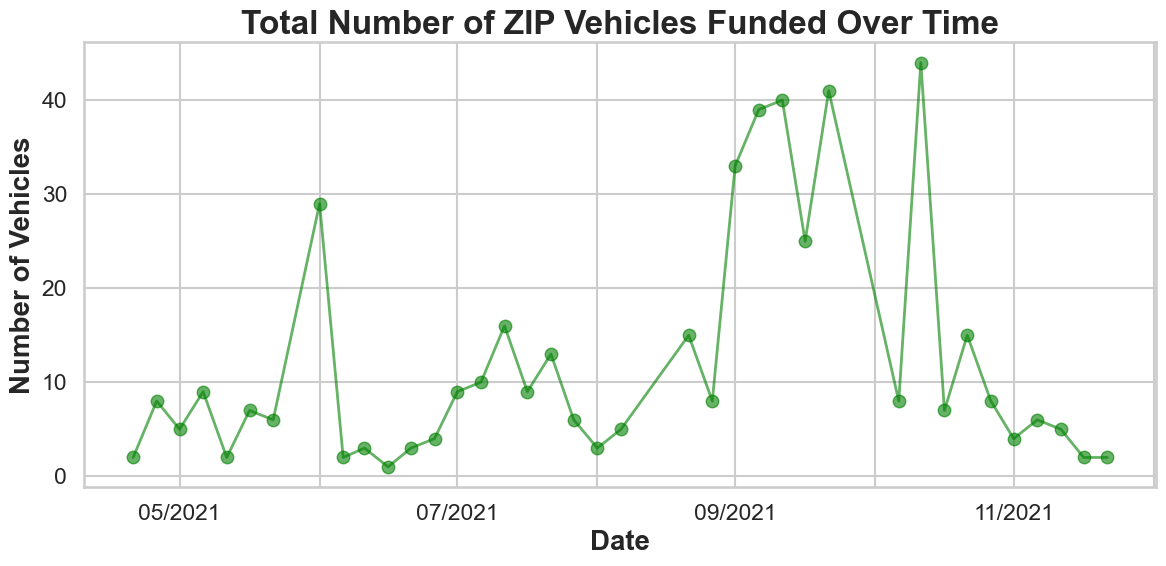

In [44]:
plt.figure(figsize=(12, 6))
monthly_vehicle_count = data.groupby(data['Date'].dt.to_period('M'))['How many vehicles of this model purchasing?'].sum().reset_index()
plt.plot(monthly_vehicle_count['Date'].dt.to_timestamp(), monthly_vehicle_count['How many vehicles of this model purchasing?'], marker='o', color='green', alpha=0.6, linewidth=2)

plt.title('Total Number of ZIP Vehicles Funded Over Time', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Vehicles', fontsize=20)

# Format x-axis with every other label and "%m/%Y"
plt.xticks(rotation=0)
ticks = plt.gca().get_xticks()
tick_labels = [monthly_vehicle_count['Date'][int(i)].strftime('%m/%Y') if i % 2 == 0 else '' for i in range(len(ticks))]
plt.xticks(ticks, tick_labels)

plt.tight_layout()
plt.show()


C:\Users\akash\AppData\Local\Temp\ipykernel_15812\3903693234.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class Number', y='Number of Vehicles', data=class_vehicle_count, palette='viridis')


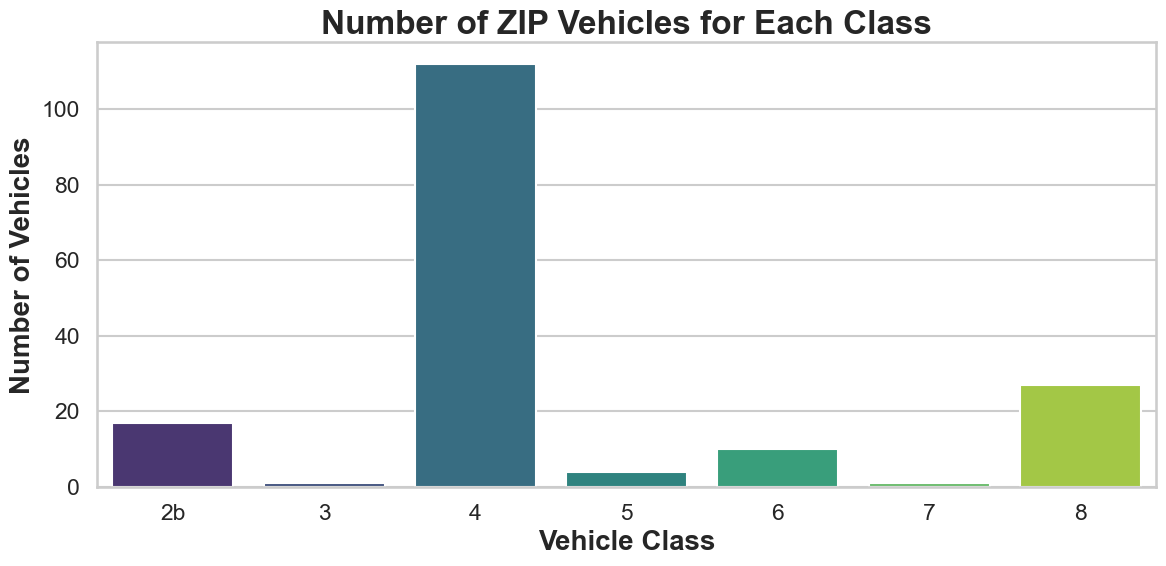

In [42]:
plt.figure(figsize=(12, 6))
class_vehicle_count = data['What is the vehicle class? '].value_counts().reset_index()
class_vehicle_count.columns = ['Vehicle Class', 'Number of Vehicles']
class_vehicle_count['Class Number'] = class_vehicle_count['Vehicle Class'].str.extract(r'Class (\d+)')
class_vehicle_count = class_vehicle_count.sort_values(by='Class Number')

# replace class number 2 with 2b
class_vehicle_count['Class Number'] = class_vehicle_count['Class Number'].replace('2', '2b')

sns.barplot(x='Class Number', y='Number of Vehicles', data=class_vehicle_count, palette='viridis')
plt.title('Number of ZIP Vehicles for Each Class', fontsize=24)
plt.xlabel('Vehicle Class', fontsize=20)
plt.ylabel('Number of Vehicles', fontsize=20)
plt.tight_layout()
plt.show()
